<a href="https://colab.research.google.com/github/tiagopessoalima/IA/blob/main/Aula_Semana_03_(IA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multi-Layer Perceptron (MLP)**

Este material explora redes neurais artificiais do tipo MLP, abordando teoria e prática. Vamos cobrir desde conceitos básicos até implementações práticas, com explicações detalhadas para facilitar o entendimento.

## **O que é uma Rede Neural e onde o MLP se encaixa?**

Uma rede neural é um modelo computacional inspirado no cérebro humano, composto por neurônios interconectados que aprendem padrões a partir de dados. O MLP é um tipo específico de rede neural *feedforward*, com múltiplas camadas (entrada, escondidas e saída), capaz de aprender relações não lineares, sendo essencial em tarefas de aprendizado profundo como classificação e regressão.

<blockquote>
    <strong>Nota:</strong> O termo <em>feedforward</em> refere-se ao mecanismo pelo qual os dados são propagados em uma única direção, começando na camada de entrada, passando por uma ou mais camadas ocultas, até chegar à camada de saída.
</blockquote>

## **Histórico e Aplicações Práticas**

O MLP tem raízes em 1943, com McCulloch e Pitts propondo o neurônio artificial, seguido por Rosenblatt em 1958 com o perceptron de camada única. Nos anos 80, Rumelhart, Hinton e Williams introduziram o backpropagation, revolucionando o treinamento de MLPs. Hoje, é aplicado em previsão financeira, reconhecimento de imagem, diagnóstico médico e análise de dados textuais, entre outros.

## **Arquitetura do MLP**

- **Camada de entrada:** Recebe os dados brutos.
- **Camadas escondidas:** Processam e extraem características complexas, com múltiplas camadas aumentando a capacidade de aprendizado.
- **Camada de saída:** Produz a predição final, como uma classe ou valor numérico.

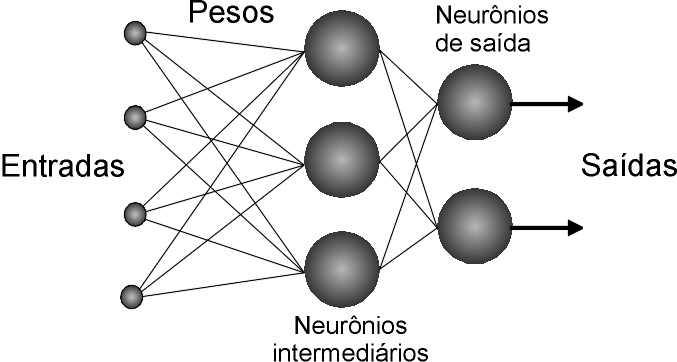

## **Funções de Ativação**

Funções de ativação introduzem não linearidade, permitindo que a rede aprenda relações complexas. Exemplos incluem:

- **Sigmóide:** $\sigma(x) = \frac{1}{1+e^{-x}}$ usada em classificação binária, com saída entre 0 e 1.

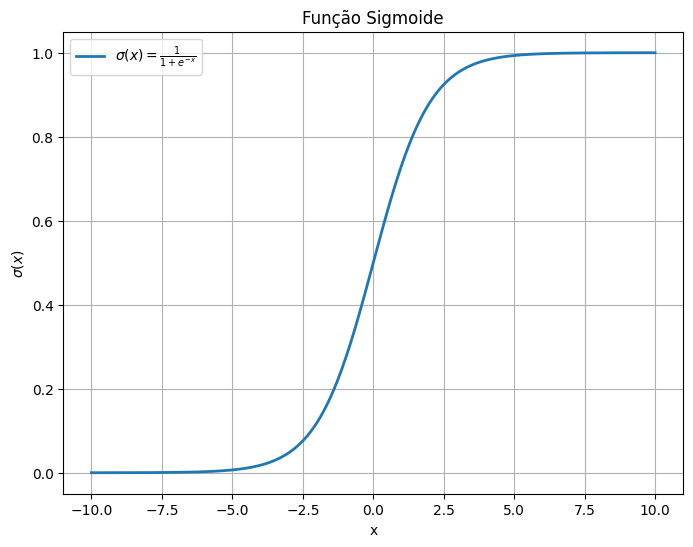

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definição da função sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Geração dos dados para o gráfico
x = np.linspace(-10, 10, 400)
y = sigmoid(x)

# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r'$\sigma(x)=\frac{1}{1+e^{-x}}$', linewidth=2)
plt.xlabel('x')
plt.ylabel(r'$\sigma(x)$')
plt.title('Função Sigmoide')
plt.legend()
plt.grid(True)
plt.show()

- **Tanh:** $\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$, com saída variando entre -1 e 1. Assim como a função sigmoide, é não linear e centrada em zero, o que a torna útil em camadas escondidas de redes neurais.

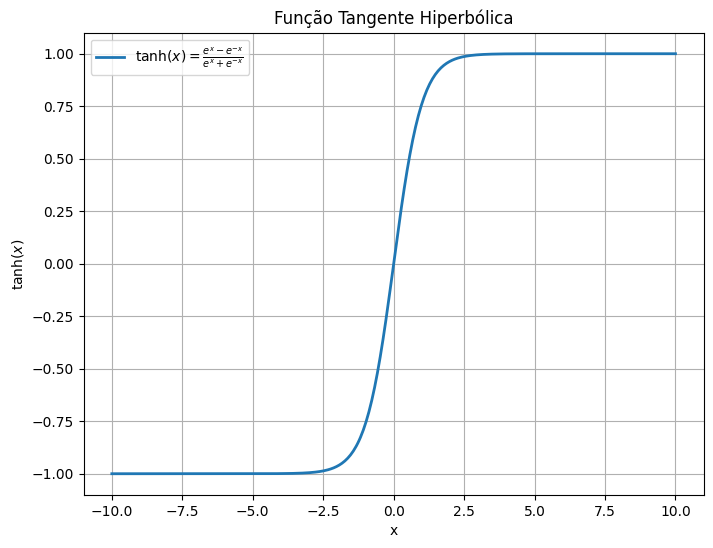

In [2]:
# Definição da função tanh
def tanh(x):
    return np.tanh(x)

# Geração dos dados para o gráfico
x = np.linspace(-10, 10, 400)
y = tanh(x)

# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r'$\tanh(x)=\frac{e^x - e^{-x}}{e^x + e^{-x}}$', linewidth=2)
plt.xlabel('x')
plt.ylabel(r'$\tanh(x)$')
plt.title('Função Tangente Hiperbólica')
plt.legend()
plt.grid(True)
plt.show()

- **Softmax:** é usada para problemas de classificação multiclasse. Ela transforma um vetor de valores (logits) em uma distribuição de probabilidade, onde a soma dos elementos é 1. Por exemplo, considerando um vetor de entrada $[x,0,−x]$, a função softmax é definida como:

<center> $\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}$ </center>

Para o vetor $[x,0,−x]$, temos três probabilidades que variam com $x$.



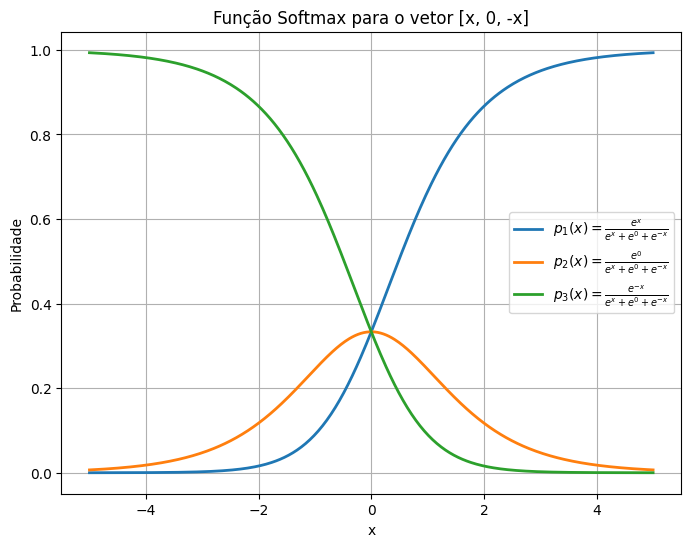

In [3]:
# Definição da função softmax para um vetor
def softmax(z):
    e_z = np.exp(z)
    return e_z / np.sum(e_z, axis=0)

# Geração dos dados para o gráfico
x = np.linspace(-5, 5, 400)
p1, p2, p3 = [], [], []

for val in x:
    # Vetor de entrada: [x, 0, -x]
    z = np.array([val, 0, -val])
    s = softmax(z)
    p1.append(s[0])
    p2.append(s[1])
    p3.append(s[2])

# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(x, p1, label=r'$p_1(x)=\frac{e^{x}}{e^{x}+e^{0}+e^{-x}}$', linewidth=2)
plt.plot(x, p2, label=r'$p_2(x)=\frac{e^{0}}{e^{x}+e^{0}+e^{-x}}$', linewidth=2)
plt.plot(x, p3, label=r'$p_3(x)=\frac{e^{-x}}{e^{x}+e^{0}+e^{-x}}$', linewidth=2)
plt.xlabel('x')
plt.ylabel('Probabilidade')
plt.title('Função Softmax para o vetor [x, 0, -x]')
plt.legend()
plt.grid(True)
plt.show()

- **ReLU:** $max(0,x)$, uma função que passa os valores positivos e zera os negativos, ajudando a manter os sinais de aprendizado fortes durante o treinamento, o que a torna popular em redes profundas.

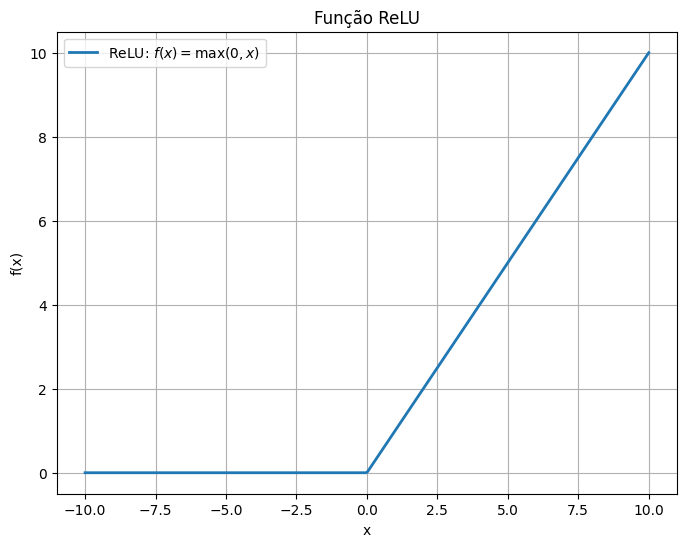

In [4]:
# Definição da função ReLU
def relu(x):
    return np.maximum(0, x)

# Geração dos dados para o gráfico
x = np.linspace(-10, 10, 400)
y = relu(x)

# Criação do gráfico
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='ReLU: $f(x)=\max(0,x)$', linewidth=2)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Função ReLU')
plt.legend()
plt.grid(True)
plt.show()

## **Propagação**

Durante a fase de propagação, os dados de entrada são processados de forma unidirecional, isto é, os sinais percorrem desde a camada de entrada até a camada de saída, passando por uma ou mais camadas ocultas. Em cada camada, os neurônios calculam uma combinação linear dos sinais recebidos (por meio de pesos) e aplicam uma função de ativação para introduzir não-linearidades. Esse mecanismo permite que a rede transforme os dados brutos em representações cada vez mais abstratas e relevantes para a tarefa desejada, seja ela classificação, regressão, entre outras.

### **1. Definição da Arquitetura da Rede**

In [5]:
input_dim = 3    # Número de neurônios na camada de entrada
hidden_dim = 2    # Número de neurônios na camada oculta
output_dim = 1    # Número de neurônios na camada de saída

- `input_dim = 3`: A arquitetura da rede neural está configurada para aceitar um vetor de entrada com $3$ dimensões. Esses $3$ valores podem representar, por exemplo, atributos como altura, peso e idade, que formam a entrada do modelo.

- `hidden_dim = 2`: A rede contém uma camada oculta composta por $2$ neurônios. Essa camada é responsável por aprender representações não lineares e abstrações dos dados de entrada. O número de neurônios nesta camada é um hiperparâmetro que influencia a capacidade do modelo em capturar padrões.

- `output_dim = 1`: A camada de saída possui um único neurônio. Essa configuração é tipicamente utilizada em problemas de regressão (para prever um valor contínuo) ou em tarefas de classificação binária, onde uma função de ativação (como a sigmoid) pode ser aplicada para mapear a saída para um intervalo de probabilidade entre $0$ e $1$.

### **2. Inicialização de Pesos e Bias**



In [6]:
np.random.seed(42)
W1 = np.random.randn(input_dim, hidden_dim)
b1 = np.random.randn(hidden_dim)
W2 = np.random.randn(hidden_dim, output_dim)
b2 = np.random.randn(output_dim)

- `np.random.seed(42)`: Define uma semente para o gerador de números aleatórios, garantindo que o experimento seja reproduzível.

- `W1 = np.random.randn(input_dim, hidden_dim)`: Inicializa a matriz de pesos `W1`. Conecta as $3$ entradas aos $2$ neurônios escondidos.

- `b1 = np.random.randn(hidden_dim)`: Cria o vetor de bias `b1` para a camada oculta, com dimensão $2$.

- `W2 = np.random.randn(hidden_dim, output_dim)`: Inicializa a matriz de pesos `W2`. Conecta os $2$ neurônios escondidos ao de saída.

- `b2 = np.random.randn(output_dim)`: Cria o vetor de bias `b2` para a camada de saída, com dimensão $1$.

Todos esses parâmetros são amostrados a partir de uma distribuição normal padrão, definida por média zero e variância unitária. Essa estratégia de inicialização assegura que os pesos e vieses comecem simetricamente em torno de zero, o que é fundamental para evitar vieses iniciais e promover uma convergência mais estável durante o treinamento da rede neural.















### **3. Visualização da Estrutura da Rede**

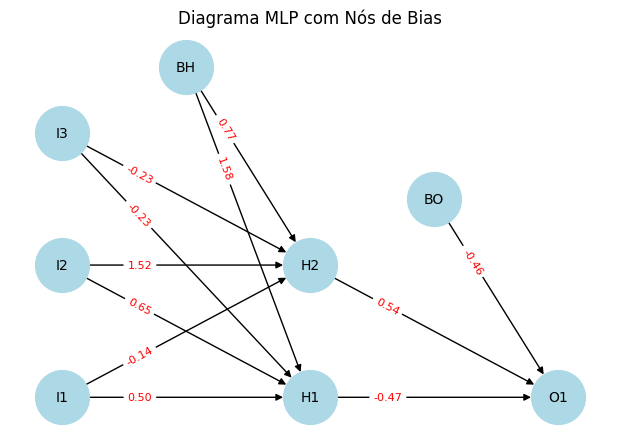

In [7]:
import networkx as nx

# Criação do grafo
G = nx.DiGraph()

# Nome dos neurônios (incluindo bias)
input_nodes = [f'I{i+1}' for i in range(input_dim)]
hidden_nodes = [f'H{i+1}' for i in range(hidden_dim)]
output_nodes = [f'O{i+1}' for i in range(output_dim)]
bias_hidden_nodes = ['BH']  # Bias para a camada oculta
bias_output_nodes = ['BO']  # Bias para a camada de saída

# Adiciona todos os nós
G.add_nodes_from(input_nodes)
G.add_nodes_from(hidden_nodes)
G.add_nodes_from(output_nodes)
G.add_nodes_from(bias_hidden_nodes)
G.add_nodes_from(bias_output_nodes)

# Dicionário para rótulos das arestas
edge_labels = {}

# Conexões da entrada para a camada oculta
for i, inp in enumerate(input_nodes):
    for j, hid in enumerate(hidden_nodes):
        G.add_edge(inp, hid)
        edge_labels[(inp, hid)] = f'{W1[i, j]:.2f}'

# Conexões do bias da camada oculta
for j, hid in enumerate(hidden_nodes):
    G.add_edge(bias_hidden_nodes[0], hid)  # BH conecta a todos os neurônios ocultos
    edge_labels[(bias_hidden_nodes[0], hid)] = f'{b1[j]:.2f}' # Rótulo é o valor do bias

# Conexões da camada oculta para a saída
for j, hid in enumerate(hidden_nodes):
    for k, out in enumerate(output_nodes):
        G.add_edge(hid, out)
        edge_labels[(hid, out)] = f'{W2[j, k]:.2f}'

# Conexões do bias da camada de saída
for k, out in enumerate(output_nodes):
    G.add_edge(bias_output_nodes[0], out) # BO conecta a todos neurônios de saída
    edge_labels[(bias_output_nodes[0], out)] = f'{b2[k]:.2f}'

# Define posições
pos = {}
# Posição dos nós de entrada
for i, node in enumerate(input_nodes):
    pos[node] = (0, i * 2)  # Espaçamento maior para acomodar os bias
# Posição do bias da camada oculta
pos[bias_hidden_nodes[0]] = (0.5, (len(input_nodes) * 2) -1 )   # Centralizado e um pouco abaixo da camada de entrada.
# Posição dos nós ocultos
for i, node in enumerate(hidden_nodes):
    pos[node] = (1, i * 2)
#Posição do bias da camada de saída
pos[bias_output_nodes[0]] = (1.5, (len(hidden_nodes)*2) -1)  # Centralizado abaixo da camada oculta.
# Posição dos nós de saída
for i, node in enumerate(output_nodes):
    pos[node] = (2, i * 2)

# Desenha o grafo
plt.figure(figsize=(6, 4))
nx.draw(G, pos, with_labels=True, node_size=1500, node_color='lightblue', arrows=True, font_size=10)
nx.draw_networkx_edge_labels(G, pos, label_pos=0.3, edge_labels=edge_labels, font_color='red', font_size=8)  #label_pos = 0.5
plt.title('Diagrama MLP com Nós de Bias')
plt.axis('off')
plt.show()

### **4. Exemplo de Entrada**

In [8]:
x = np.array([[0.5, -1.2, 0.3]])

- `x`: Um exemplo de vetor de entrada. Observe que ele é um array NumPy com uma linha e três colunas (shape (1, 3)), representando um único exemplo de dados com as $3$ características. Se você quisesse processar múltiplos exemplos de uma vez (o que é comum), `x` teria mais linhas.

### **5. Propagação**

#### **Propagação na Camada Oculta**

In [9]:
z1 = np.dot(x, W1) + b1   # Cálculo linear (pré-ativação)
a1 = sigmoid(z1)          # Ativação com sigmoide

##### **Dados:**

- $x$ é o vetor de entrada:

<center> $x = \begin{bmatrix} 0.5 & -1.2 & 0.3 \end{bmatrix}$ </center>

- $W_1$ é a matriz de pesos:

<center> $W_1 =
\begin{bmatrix}
0.49671415 & -0.1382643 \\
0.64768854 & 1.52302986 \\
-0.23415337 & -0.23413696\\
\end{bmatrix}$ </center>

- $b_1$ é o vetor de bias:

<center> $b_1 = \begin{bmatrix} 1.57921282 & 0.76743473 \end{bmatrix}$ </center>


##### **Cálculo da Ativação Linear:**

1. Para o primeiro neurônio:

<center> $z_1^{(1)} = 0.5 \times 0.49671415 + (-1.2) \times 0.64768854 + 0.3 \times (-0.23415337) + 1.57921282$ </center>

<center> $= 0.248357075 - 0.777226248 - 0.070246011 + 1.57921282$ </center>

<center> $\approx 0.9801$ </center>

2. Para o segundo neurônio:

<center> $z_1^{(2)} = 0.5 \times (-0.1382643) + (-1.2) \times 1.52302986 + 0.3 \times (-0.23413696) + 0.76743473$ </center>

<center> $= -0.06913215 - 1.827635832 - 0.070241088 + 0.76743473$ </center>

<center> $\approx -1.1996$ </center>

Resultado da propagação linear na camada oculta:

<center> $z_1 \approx \begin{bmatrix} 0.9801 & -1.1996 \end{bmatrix}$ </center>

##### **Aplicação da Função de Ativação:**


Após calcular $z_1$, aplicamos a função sigmoide para obter $a_1$:

<center> $a_1 = σ(z_1) = [σ(0.9801), σ(-1.1996)] = [0.72712759, 0.23155095]$ </center>

#### **Propagação na Camada de Saída**

In [10]:
z2 = np.dot(a1, W2) + b2    # Cálculo linear (pré-ativação)
a2 = sigmoid(z2)            # Ativação com sigmoid

##### **Dados:**

- $a_1 = [0.72712759, 0.23155095]$

- $W_2 =
\begin{bmatrix}
-0.46947439 \\
0.54256004
\end{bmatrix}$

- $b_2=-0.46341769$

##### **Cálculo da Ativação Linear:**

<center> $z_2 = (0.72712759 \times -0.46947439) + (0.23155095 \times 0.54256004) + (-0.46341769)$ </center>

<center> $= \approx -0.341001 + 0.125691 - 0.46341769$ </center>

<center> $\approx -0.67872869$ </center>


##### **Aplicação da Função de Ativação**

Após calcular $z_2$, aplicamos a função sigmoide para obter $a_2$:

<center> $a_2 = σ(z_2) = [σ(-0.67872869)] \approx [0.3364]$ </center>

### **6. Retropropagação**

Na retropropagação, o objetivo é ajustar os pesos e bias da rede minimizando o erro. Usamos a regra da cadeia para calcular como cada parâmetro contribuiu para o erro final. O processo envolve os seguintes passos:

#### **6.1. Erro na Saída**

Suponha que a função de custo seja o erro quadrático:
\[
E = \frac{1}{2}(a_2 - y)^2,
\]
onde:
- \(a_2\) é a ativação da camada de saída (obtida pela função sigmoide),
- \(y\) é o valor esperado.

A derivada do erro em relação à saída é:
\[
\frac{\partial E}{\partial a_2} = a_2 - y.
\]

#### **6.2. Gradiente na Camada de Saída**

Para a camada de saída, queremos saber como o erro varia em relação à entrada linear \(z_2\) (antes da sigmoide). Como a derivada da sigmoide é:
\[
\sigma'(z) = \sigma(z)(1-\sigma(z)),
\]
definimos:
\[
\delta_2 = \frac{\partial E}{\partial z_2} = (a_2 - y) \cdot \sigma'(z_2).
\]

*Exemplo:*  
Com \(a_2 \approx 0.3364\) e \(z_2 \approx -0.67873\), temos:
\[
\sigma'(z_2) \approx 0.3364(1-0.3364) \approx 0.223.
\]
Se o valor esperado for \(y = 1\), então:
\[
\delta_2 \approx (0.3364 - 1) \times 0.223 \approx -0.1478.
\]

Os gradientes dos pesos \(W_2\) e do viés \(b_2\) são:
- \(\frac{\partial E}{\partial W_2} = a_1^T \cdot \delta_2\)  
  (multiplicamos cada valor de \(a_1\) pelo erro \(\delta_2\)).
- \(\frac{\partial E}{\partial b_2} = \delta_2.\)

#### **6.3. Gradiente na Camada Oculta**

Propagamos o erro para a camada oculta usando os pesos \(W_2\):
\[
\delta_1 = (\delta_2 \cdot W_2^T) \odot \sigma'(z_1),
\]
onde \(\odot\) indica a multiplicação elemento a elemento e \(\sigma'(z_1) = a_1(1-a_1)\).

*Exemplo para cada neurônio oculto:*
- Para o primeiro neurônio:  
  Se \(z_1^{(1)} \approx 0.9801\) e \(a_1^{(1)} \approx 0.7271\), então:
  \[
  \sigma'(z_1^{(1)}) \approx 0.7271(1-0.7271) \approx 0.1986.
  \]
  Usando o peso \(W_2^{(1)}\) (da primeira unidade oculta para a saída):
  \[
  \delta_1^{(1)} \approx \delta_2 \times W_2^{(1)} \times 0.1986.
  \]

- Para o segundo neurônio:  
  Se \(z_1^{(2)} \approx -1.1996\) e \(a_1^{(2)} \approx 0.2316\), então:
  \[
  \sigma'(z_1^{(2)}) \approx 0.2316(1-0.2316) \approx 0.1779.
  \]
  Usando o peso \(W_2^{(2)}\):
  \[
  \delta_1^{(2)} \approx \delta_2 \times W_2^{(2)} \times 0.1779.
  \]

Os gradientes para os pesos \(W_1\) e viés \(b_1\) são:
\[
\frac{\partial E}{\partial W_1} = x^T \cdot \delta_1,\quad \frac{\partial E}{\partial b_1} = \delta_1.
\]

#### **6.4. Atualização dos Pesos e Vieses**

Com uma taxa de aprendizado \(\eta\), os parâmetros são atualizados assim:
\[
W \leftarrow W - \eta \frac{\partial E}{\partial W}, \quad b \leftarrow b - \eta \frac{\partial E}{\partial b}.
\]

*Exemplo:*  
Se \(\eta = 0.1\), atualize cada peso e viés subtraindo 0.1 vezes o gradiente correspondente.

### **Resumo Simplificado**

1. **Erro na Saída:**  
   Calcule \(a_2 - y\).

2. **Camada de Saída:**  
   - Compute \(\delta_2 = (a_2 - y) \cdot \sigma'(z_2)\).  
   - Calcule os gradientes para \(W_2\) e \(b_2\).

3. **Camada Oculta:**  
   - Propague o erro: \(\delta_1 = (\delta_2 \cdot W_2^T) \odot \sigma'(z_1)\).  
   - Calcule os gradientes para \(W_1\) e \(b_1\).

4. **Atualização:**  
   Atualize os pesos e vieses subtraindo a taxa de aprendizado multiplicada pelos gradientes.

Essa abordagem permite que a rede ajuste seus parâmetros para reduzir o erro e melhorar o desempenho na tarefa de aprendizado.



In [11]:
import numpy as np

# Função de ativação sigmoide e sua derivada
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def dsigmoid(a):
    # Derivada em função da própria ativação a = sigmoid(z)
    return a * (1 - a)

# Exemplo de dado de entrada e valor esperado (target)
x = np.array([[0.5, -1.2, 0.3]])  # Input (1 x 3)
y = np.array([[1]])              # Target (1 x 1)

# Inicializando pesos e vieses (baseado nos dados de propagação)
np.random.seed(42)
# Camada de entrada para oculta: 3 entradas -> 2 neurônios
W1 = np.array([[0.49671415, -0.1382643],
               [0.64768854,  1.52302986],
               [-0.23415337, -0.23413696]])
b1 = np.array([[1.57921282, 0.76743473]])

# Camada oculta para saída: 2 neurônios -> 1 saída
W2 = np.array([[-0.46947439],
               [ 0.54256004]])
b2 = np.array([[-0.46341769]])

# ---------------------------
# Forward Propagation
# ---------------------------
# Camada Oculta
z1 = np.dot(x, W1) + b1
a1 = sigmoid(z1)

# Camada de Saída
z2 = np.dot(a1, W2) + b2
a2 = sigmoid(z2)

print("Forward Propagation:")
print("z1 =", z1)
print("a1 =", a1)
print("z2 =", z2)
print("a2 =", a2)

# ---------------------------
# Retropropagação (Backpropagation)
# ---------------------------
# Função de custo: Erro Quadrático Médio (MSE)
# E = 1/2 * (a2 - y)^2
# Derivada do erro em relação a a2:
dE_da2 = a2 - y

# Retropropagação na camada de saída:
# delta2 = dE/dz2 = (a2 - y) * sigmoid'(z2)
delta2 = dE_da2 * dsigmoid(a2)

# Gradientes para W2 e b2:
grad_W2 = np.dot(a1.T, delta2)
grad_b2 = delta2  # Para uma única amostra

# Retropropagação para a camada oculta:
# delta1 = (delta2 . W2^T) * sigmoid'(z1)
delta1 = np.dot(delta2, W2.T) * dsigmoid(a1)

# Gradientes para W1 e b1:
grad_W1 = np.dot(x.T, delta1)
grad_b1 = delta1

print("\nGradientes:")
print("delta2 =", delta2)
print("grad_W2 =", grad_W2)
print("grad_b2 =", grad_b2)
print("delta1 =", delta1)
print("grad_W1 =", grad_W1)
print("grad_b1 =", grad_b1)

# ---------------------------
# Atualização dos Pesos e Vieses
# ---------------------------
learning_rate = 0.1

W2 = W2 - learning_rate * grad_W2
b2 = b2 - learning_rate * grad_b2
W1 = W1 - learning_rate * grad_W1
b1 = b1 - learning_rate * grad_b1

print("\nParâmetros Atualizados:")
print("W1 =", W1)
print("b1 =", b1)
print("W2 =", W2)
print("b2 =", b2)


Forward Propagation:
z1 = [[ 0.98009764 -1.19957434]]
a1 = [[0.72712759 0.23155095]]
z2 = [[-0.67915518]]
a2 = [[0.33644988]]

Gradientes:
delta2 = [[-0.14813847]]
grad_W2 = [[-0.10771557]
 [-0.0343016 ]]
grad_b2 = [[-0.14813847]]
delta1 = [[ 0.01379908 -0.01430136]]
grad_W1 = [[ 0.00689954 -0.00715068]
 [-0.01655889  0.01716163]
 [ 0.00413972 -0.00429041]]
grad_b1 = [[ 0.01379908 -0.01430136]]

Parâmetros Atualizados:
W1 = [[ 0.4960242  -0.13754923]
 [ 0.64934443  1.5213137 ]
 [-0.23456734 -0.23370792]]
b1 = [[1.57783291 0.76886487]]
W2 = [[-0.45870283]
 [ 0.5459902 ]]
b2 = [[-0.44860384]]


## **TensorFlow / Keras**

TensorFlow é uma biblioteca desenvolvida pelo Google para computação numérica e machine learning, utilizada para construir e treinar modelos de deep learning. Keras é uma API que roda sobre o TensorFlow (entre outras plataformas) e simplifica a criação, o treinamento e a experimentação com redes neurais, permitindo a implementação rápida de modelos de forma intuitiva e com poucas linhas de código.

### **1. Importação das Bibliotecas**

In [12]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

- **tensorflow (tf)**: Biblioteca de machine learning que permite criar e treinar modelos.

- **tensorflow.keras:** API de alto nível do TensorFlow para criação e treinamento de redes neurais.

 - **Sequential:** Modelo sequencial que empilha camadas linearmente.

 - **Dense:** Tipo de camada totalmente conectada (feedforward).

### **2. Geração de Dados Aleatórios**

In [13]:
# Gerando dados aleatórios: 100 amostras, 4 features; 3 classes
X = np.random.rand(100, 4)
y = np.random.randint(0, 3, 100)

- **X:** Cria um array de 100 amostras, cada uma com 4 características (features), com valores aleatórios entre 0 e 1.

- **y:** Cria um vetor com 100 rótulos inteiros aleatórios (0, 1 ou 2), representando 3 classes diferentes.

### **3. Definição do Modelo MLP**

In [14]:
model = Sequential([
    Dense(10, activation='relu', input_shape=(4,)),  # camada oculta com 10 neurônios
    Dense(3, activation='softmax')                   # camada de saída para 3 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- **Sequential:** Cria um modelo onde as camadas são adicionadas em sequência.

- **Primeira camada (Dense):**
 - 10 neurônios.
 - Função de ativação **ReLU** (introduz não linearidade).
 - `input_shape=(4,)`: Define que cada amostra de entrada possui 4 features.

- **Segunda camada (Dense):**
 - 3 neurônios, correspondendo às 3 classes.
 - Função de ativação softmax para gerar probabilidades, de forma que a soma das saídas seja 1, apropriado para multi-classe.

### **4. Compilação do Modelo**

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

- `optimizer='adam'`: Algoritmo de otimização que ajusta os pesos do modelo de forma eficiente.

- `loss='sparse_categorical_crossentropy'`: Função de perda adequada para classificação multi-classe quando os rótulos são inteiros.

- `metrics=['accuracy']`: Durante o treinamento, a acurácia será calculada para avaliar a performance do modelo.

### **5. Visualização do Resumo do Modelo**

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 83 (332.00 B)

 Trainable params: 83 (332.00 B)

 Non-trainable params: 0 (0.00 B)

Exibe um resumo do modelo, mostrando as camadas, o número de parâmetros e a forma das saídas em cada camada.

### **6. Treinamento do Modelo**

In [17]:
model.fit(X, y, epochs=10, batch_size=8)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3443 - loss: 1.1112
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3442 - loss: 1.0938
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3136 - loss: 1.0841  
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3295 - loss: 1.0922
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3380 - loss: 1.0913
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3689 - loss: 1.0925  
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4037 - loss: 1.0829 
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4138 - loss: 1.0769 
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3752 - loss: 1.0803
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3783 - loss: 1.0794  


- `model.fit`: Função que inicia o treinamento do modelo.
 - `X`, `y`: Dados de entrada e rótulos.
 - `epochs=10`: Número de vezes que o modelo passará por todo o conjunto de dados.
 - `batch_size=8`: Número de amostras utilizadas para atualizar os pesos a cada iteração.

## **PyTorch**

PyTorch é uma biblioteca open-source desenvolvida pelo Facebook, focada em deep learning e conhecida por sua abordagem dinâmica (define-by-run), que permite maior flexibilidade na construção e depuração de modelos. Ele é amplamente utilizado na pesquisa e na indústria devido à sua facilidade de uso, sintaxe simples e forte integração com o ecossistema Python, facilitando a prototipagem e o desenvolvimento de modelos de machine learning.

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim

# Definindo a arquitetura da MLP
class MLP(nn.Module):
    def __init__(self, input_size=4, hidden_size=10, output_size=3):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # camada oculta
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)  # camada de saída

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instanciando o modelo
model = MLP()

# Definindo a função de perda e o otimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Gerando dados aleatórios: 100 amostras, 4 features; 3 classes
X = torch.randn(100, 4)
y = torch.randint(0, 3, (100,))

# Treinamento simples
for epoch in range(10):
    optimizer.zero_grad()          # zerando os gradientes
    outputs = model(X)             # forward
    loss = criterion(outputs, y)   # calculando a perda
    loss.backward()                # backpropagation
    optimizer.step()               # atualizando os pesos
    print(f"Época {epoch+1}, Loss: {loss.item():.4f}")


Época 1, Loss: 1.1311
Época 2, Loss: 1.1184
Época 3, Loss: 1.1072
Época 4, Loss: 1.0973
Época 5, Loss: 1.0888
Época 6, Loss: 1.0814
Época 7, Loss: 1.0752
Época 8, Loss: 1.0696
Época 9, Loss: 1.0644
Época 10, Loss: 1.0596
